In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading norm data

In [2]:
norms = pd.read_csv('psychNorms.csv.zip', compression='zip', index_col=0, low_memory=False)
norms

,Freq_HAL,Freq_KF,Freq_SUBTLEXUS,Freq_SUBTLEXUK,Freq_Blog,Freq_Twitter,Freq_News,Freq_CobW,Freq_CobS,CD_SUBTLEXUS,...,iconicity_winter_2017,living_vanarsdall,thought_vanarsdall,reproduction_vanarsdall,person_vanarsdall,goals_vanarsdall,movement_vanarsdall,concreteness_vanarsdall,familiarity_vanarsdall,imageability_vanarsdall
'em,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3617,1.9138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'neath,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
're,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9031,1.6335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'shun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'tis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4771,0.6021,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trappy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vocalise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listened..to.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spoke..to.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


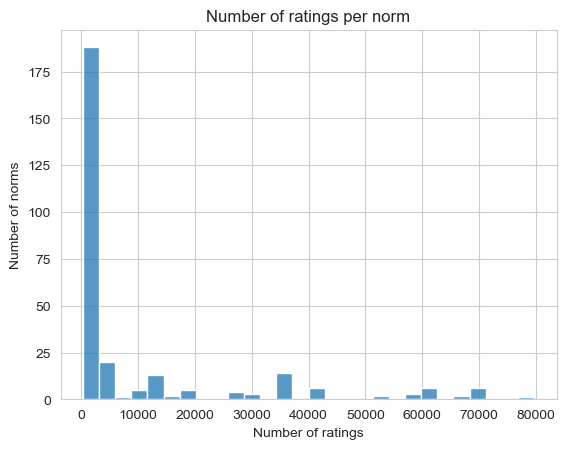

In [3]:
# Number of responses per norm
ax = sns.histplot(norms.count())
ax.set(xlabel='Number of ratings', ylabel='Number of norms', title='Number of ratings per norm')
plt.show()

## Loading metadata

In [4]:
meta = pd.read_csv('psychNorms_metadata.csv')
meta

,name,description,citation,category
0,Freq_HAL,Log10 version of frequency norms based on the ...,"Lund, K. and C. Burgess (1996). ""Producing hig...",frequency
1,Freq_KF,Log10 version of frequency norms based on the ...,"Kučera, H. and W. N. Francis (1967). Computati...",frequency
2,Freq_SUBTLEXUS,Log10 version of frequency norms based on the ...,"Brysbaert, M. and B. New (2009). ""Moving beyon...",frequency
3,Freq_SUBTLEXUK,Log10 version of the frequency norms based on ...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",frequency
4,Freq_Blog,Log10 version of the frequency norms based on ...,"Gimenes, M. and B. New (2016). ""Worldlex: Twit...",frequency
...,...,...,...,...
276,goals_vanarsdall,Ratings from 1 (low goal directedness) to 7 (h...,"@article{vanarsdall2022analyzing,\n title={An...",animacy
277,movement_vanarsdall,Ratings from 1 (low movement likelihood) to 7 ...,"@article{vanarsdall2022analyzing,\n title={An...",animacy
278,concreteness_vanarsdall,Ratings from 1 (highly abstract) to 7 (highty ...,"@article{vanarsdall2022analyzing,\n title={An...",concreteness
279,familiarity_vanarsdall,Ratings from 1 (highly unfamiliar) to 7 (highl...,"@article{vanarsdall2022analyzing,\n title={An...",familiarity


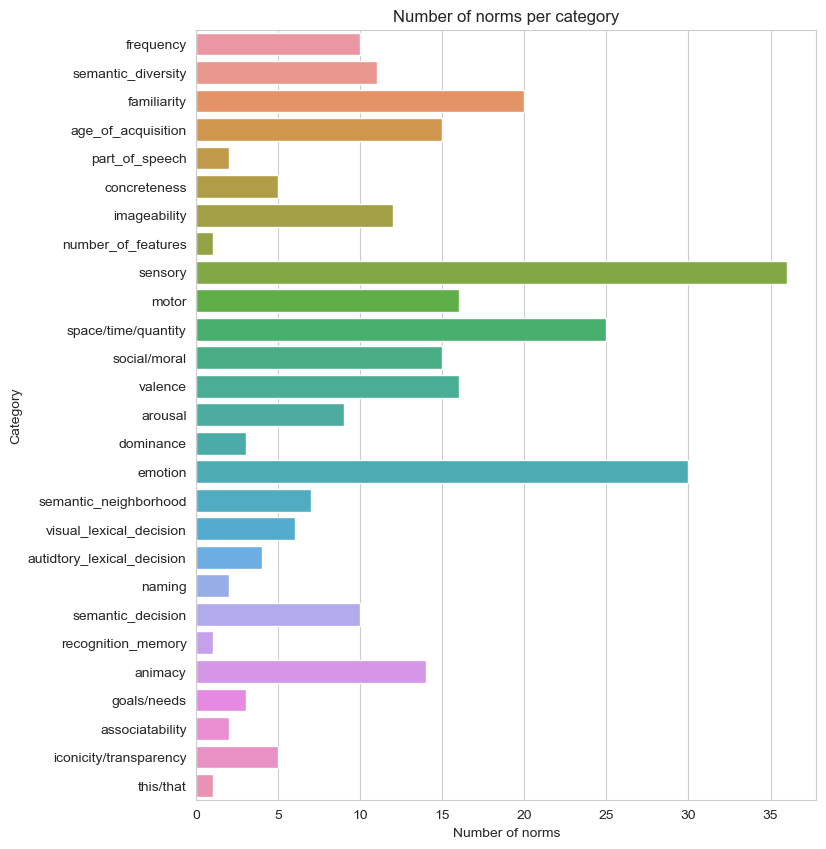

In [13]:
# Number of norms per category
fig, ax = plt.subplots(figsize=(8, 10))
sns.countplot(y=meta['category'], ax=ax)
ax.set(xlabel='Number of norms', ylabel='Category', title='Number of norms per category')
plt.show()

## Joining metadata with norms

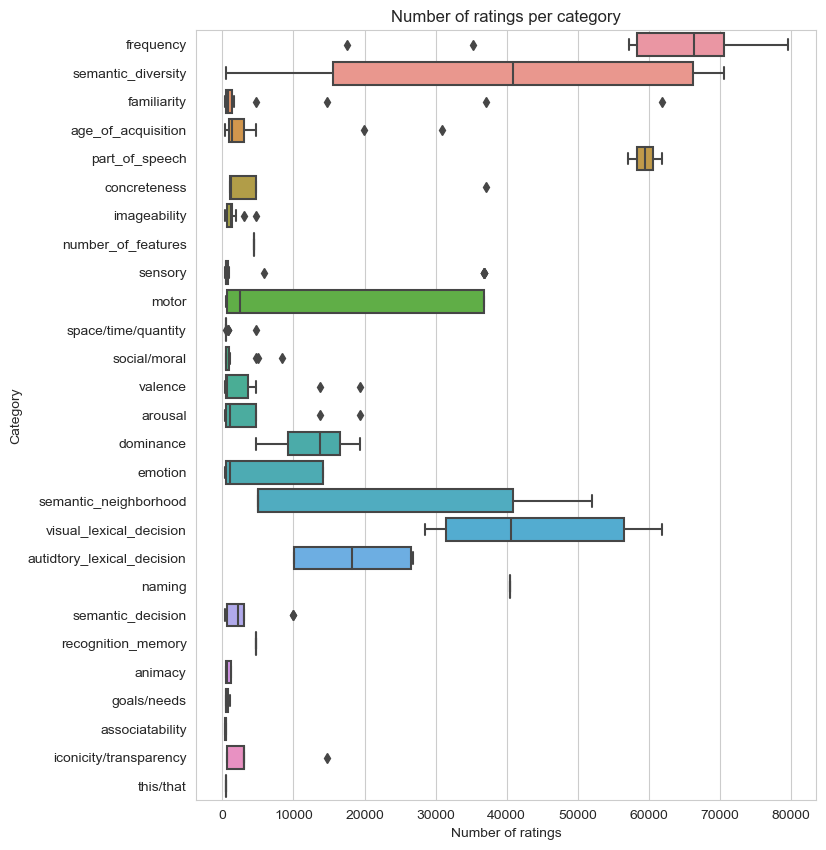

In [12]:
meta['n_ratings'] = meta['name'].apply(lambda x: norms[x].count())

# Number of ratings per category
fig, ax = plt.subplots(figsize=(8, 10))
sns.boxplot(x='n_ratings', y='category', data=meta, ax=ax)
ax.set(xlabel='Number of ratings', ylabel='Category', title='Number of ratings per category')
plt.show()